In [40]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [5]:


# Replace with your actual API key
api_key = "DXR4NMZ8HZ4NK4KN"

# Attempting to use TIME_SERIES_DAILY for XAU/USD, if supported by Alpha Vantage
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=XAUUSD&apikey={api_key}"

response = requests.get(url)
data = response.json()

print(data)



{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'XAUUSD', '3. Last Refreshed': '2024-11-15', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2024-11-15': {'1. open': '2566.9700', '2. high': '2576.1300', '3. low': '2554.5800', '4. close': '2563.1900', '5. volume': '0'}, '2024-11-14': {'1. open': '2571.0000', '2. high': '2577.5400', '3. low': '2536.8900', '4. close': '2566.9500', '5. volume': '0'}, '2024-11-13': {'1. open': '2599.0600', '2. high': '2618.9100', '3. low': '2569.4600', '4. close': '2570.9700', '5. volume': '0'}, '2024-11-12': {'1. open': '2624.0800', '2. high': '2627.2100', '3. low': '2589.8000', '4. close': '2599.0300', '5. volume': '0'}, '2024-11-11': {'1. open': '2685.6900', '2. high': '2686.2300', '3. low': '2610.6700', '4. close': '2624.0800', '5. volume': '0'}, '2024-11-10': {'1. open': '2682.5900', '2. high': '2685.7200', '3. low': '2681.5200', '4. close': '2685.7200', '5. volume'

In [9]:
# Extracting the time series data
time_series = data['Time Series (Daily)']

# Converting the time series data to a pandas DataFrame
df = pd.DataFrame.from_dict(time_series, orient='index')

# Renaming the columns for readability
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Converting index to datetime format and sorting by date
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# Display the DataFrame
print(df)


                 Open       High        Low      Close Volume
2024-07-23  2395.8500  2412.0300  2388.3900  2408.6400      0
2024-07-24  2408.6500  2432.0900  2394.6200  2398.7100      0
2024-07-25  2398.7200  2400.1700  2353.2600  2363.9100      0
2024-07-26  2363.9600  2390.8400  2355.8100  2387.1900      0
2024-07-28  2386.7000  2403.3000  2386.7000  2397.1600      0
...               ...        ...        ...        ...    ...
2024-11-11  2685.6900  2686.2300  2610.6700  2624.0800      0
2024-11-12  2624.0800  2627.2100  2589.8000  2599.0300      0
2024-11-13  2599.0600  2618.9100  2569.4600  2570.9700      0
2024-11-14  2571.0000  2577.5400  2536.8900  2566.9500      0
2024-11-15  2566.9700  2576.1300  2554.5800  2563.1900      0

[100 rows x 5 columns]


In [17]:
df['Open'] = pd.to_numeric(df['Open'])
df['High'] = pd.to_numeric(df['High'])
df['Low'] = pd.to_numeric(df['Low'])
df['Close'] = pd.to_numeric(df['Close'])


In [18]:
print(df[['Close', '20_day_MA', '50_day_MA']].tail())


              Close  20_day_MA  50_day_MA
2024-11-11  2624.08  2725.2375  2673.8964
2024-11-12  2599.03  2719.0110  2674.2924
2024-11-13  2570.97  2711.4830  2674.0370
2024-11-14  2566.95  2702.4995  2673.8924
2024-11-15  2563.19  2694.5905  2673.9690


(2363.91, 2785.48)

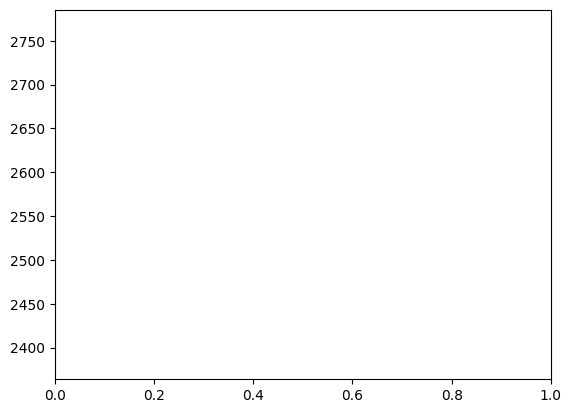

In [19]:
plt.ylim([min(df['Close'].min(), df['20_day_MA'].min()), max(df['Close'].max(), df['50_day_MA'].max())])


In [13]:
df.describe()

,Open,High,Low,Close,Volume
count,100,100,100,100,100
unique,100,100,100,100,1
top,2395.8500,2412.0300,2388.3900,2408.6400,0
freq,1,1,1,1,100


## Calculate Moving Averages:

In [20]:
df['20_day_MA'] = df['Close'].rolling(window=20).mean()  # 20-day moving average
df['50_day_MA'] = df['Close'].rolling(window=50).mean()  # 50-day moving average

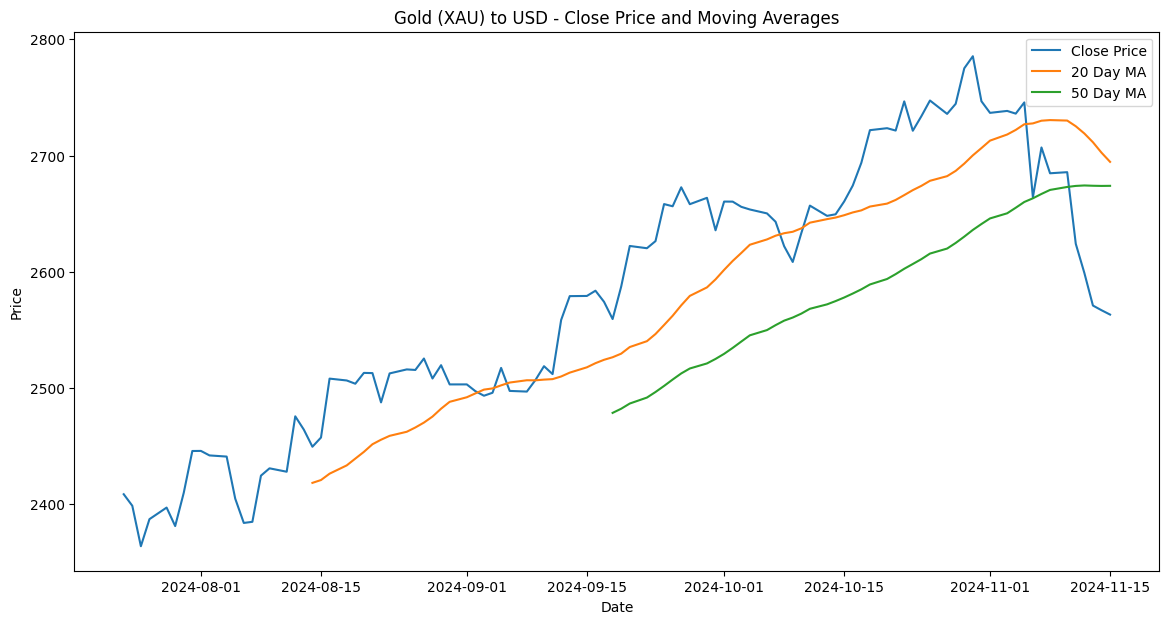

In [21]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['20_day_MA'], label='20 Day MA')
plt.plot(df['50_day_MA'], label='50 Day MA')
plt.title('Gold (XAU) to USD - Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## Calculate daily returns to observe the percentage change from one day to the next.

In [32]:
df['Daily_Return'] = df['Close'].pct_change() * 100  # Percentage return

In [33]:
df['20_day_volatility'] = df['Daily_Return'].rolling(window=20).std()


In [34]:
# Drop rows where 20-day or 50-day moving averages are NaN
df = df.dropna(subset=['20_day_MA', '50_day_MA'])


In [35]:
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')


In [37]:
# Use ffill() and bfill() directly instead of fillna with the method argument
df = df.ffill().bfill()



In [38]:
# Drop the Volume column if it is not needed
df = df.drop(columns=['Volume'])


In [39]:
# Check for any remaining NaNs
print(df.isnull().sum())

# Preview the cleaned data
print(df.head())


Open                 0
High                 0
Low                  0
Close                0
20_day_MA            0
50_day_MA            0
Daily_Return         0
20_day_volatility    0
dtype: int64
               Open     High      Low    Close  20_day_MA  50_day_MA  \
2024-09-18  2574.17  2600.21  2546.94  2559.36  2526.4895  2478.6304   
2024-09-19  2559.37  2594.94  2551.14  2587.30  2529.5845  2482.2036   
2024-09-20  2587.27  2625.82  2584.91  2622.23  2535.2860  2486.6740   
2024-09-22  2621.26  2622.17  2618.78  2620.29  2540.3170  2491.8016   
2024-09-23  2620.30  2634.89  2613.91  2626.40  2546.4810  2496.5858   

            Daily_Return  20_day_volatility  
2024-09-18      1.091679           0.698355  
2024-09-19      1.091679           0.698355  
2024-09-20      1.350056           0.698355  
2024-09-22     -0.073983           0.698355  
2024-09-23      0.233180           0.698355  


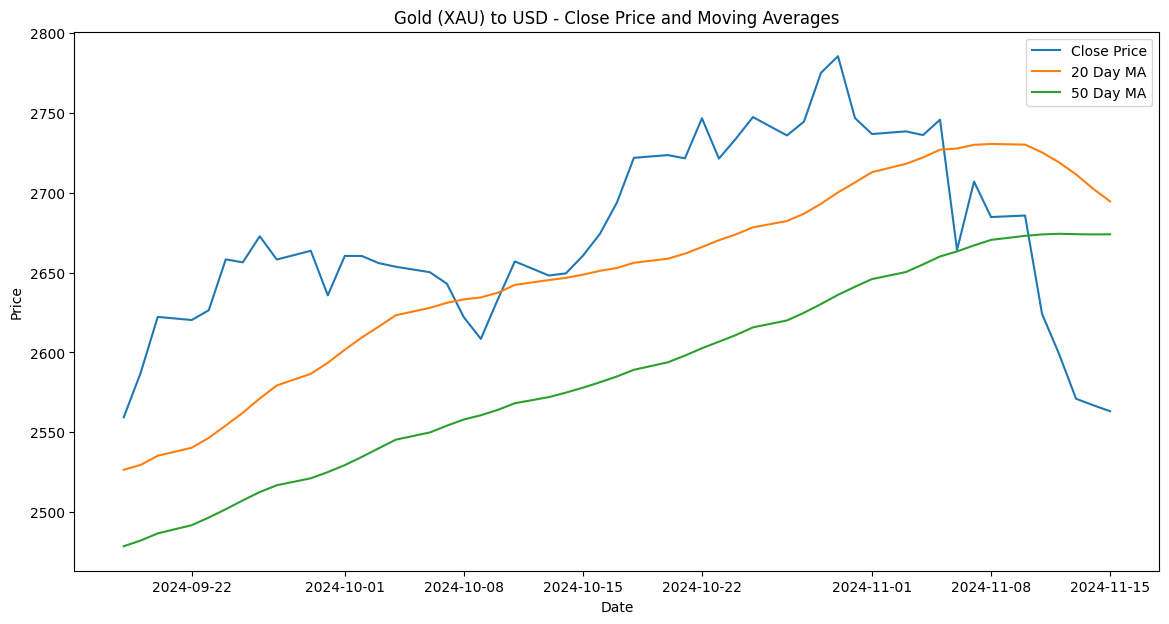

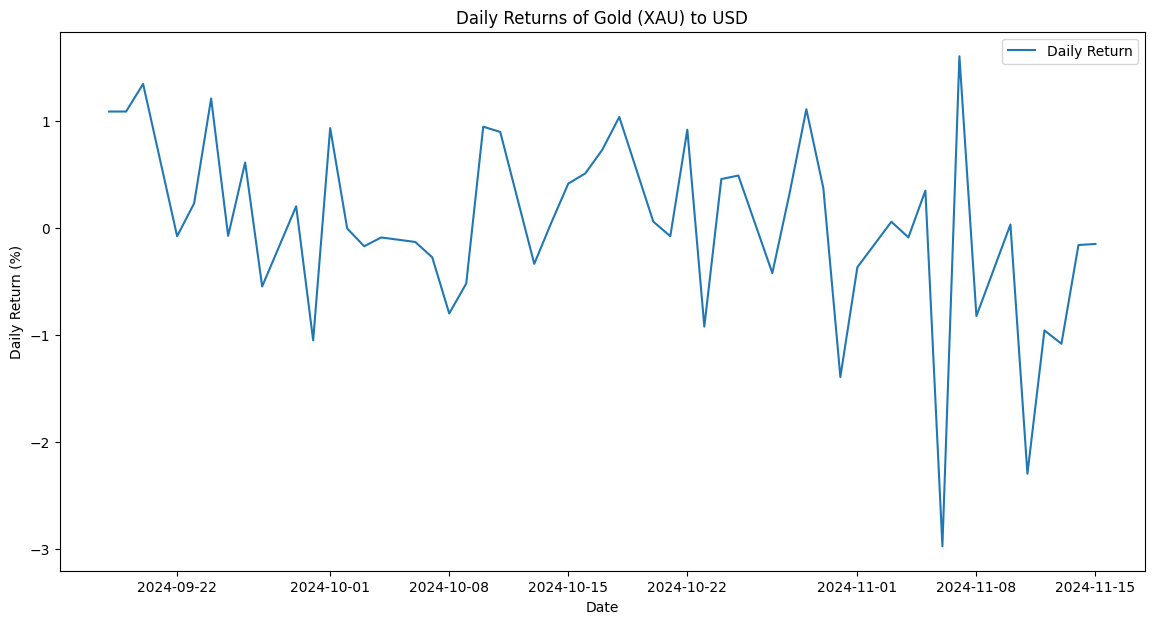

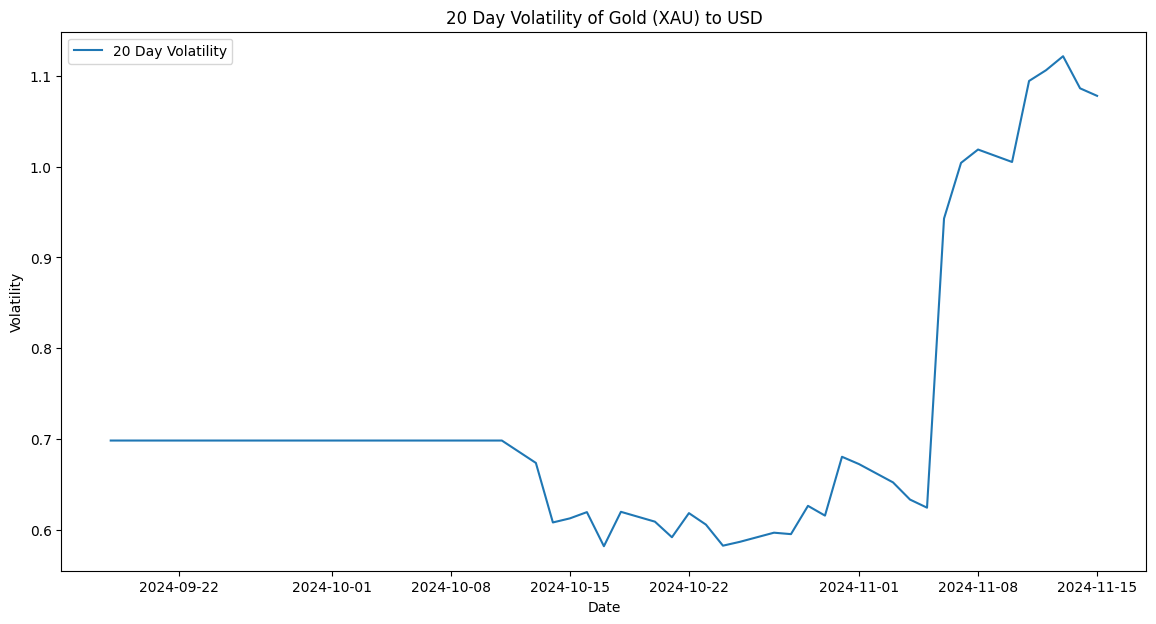

In [41]:
# Plot Close price with moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['20_day_MA'], label='20 Day MA')
plt.plot(df['50_day_MA'], label='50 Day MA')
plt.title('Gold (XAU) to USD - Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot Daily Returns
plt.figure(figsize=(14, 7))
plt.plot(df['Daily_Return'], label='Daily Return')
plt.title('Daily Returns of Gold (XAU) to USD')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.show()

# Plot Volatility
plt.figure(figsize=(14, 7))
plt.plot(df['20_day_volatility'], label='20 Day Volatility')
plt.title('20 Day Volatility of Gold (XAU) to USD')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


## Analyze Moving Average Crossovers:

In [42]:
df['Signal'] = 0
df['Signal'] = df['20_day_MA'] > df['50_day_MA']
df['Signal'] = df['Signal'].diff()  # Detect crossover points
buy_signals = df[df['Signal'] == 1]
sell_signals = df[df['Signal'] == -1]


## Calculate Additional Metrics (Optional):

In [43]:
df['Cumulative_Return'] = (1 + df['Daily_Return'] / 100).cumprod() - 1


In [49]:
df.head()

,Open,High,Low,Close,20_day_MA,50_day_MA,Daily_Return,20_day_volatility,Signal,Cumulative_Return
2024-09-18,2574.17,2600.21,2546.94,2559.36,2526.4895,2478.6304,1.091679,0.698355,NaN,0.010917
2024-09-19,2559.37,2594.94,2551.14,2587.30,2529.5845,2482.2036,1.091679,0.698355,False,0.021953
2024-09-20,2587.27,2625.82,2584.91,2622.23,2535.2860,2486.6740,1.350056,0.698355,False,0.035750
2024-09-22,2621.26,2622.17,2618.78,2620.29,2540.3170,2491.8016,-0.073983,0.698355,False,0.034983
2024-09-23,2620.30,2634.89,2613.91,2626.40,2546.4810,2496.5858,0.233180,0.698355,False,0.037397


In [50]:
df.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
20_day_MA            0
50_day_MA            0
Daily_Return         0
20_day_volatility    0
Signal               1
Cumulative_Return    0
dtype: int64

In [63]:
# Fill the first NaN value in 'Signal' with 0
df['Signal'] = df['Signal'].fillna(0)


In [64]:
df['Buy_Signal'] = (df['20_day_MA'] > df['50_day_MA']) & (df['20_day_MA'].shift(1) <= df['50_day_MA'].shift(1))
df['Sell_Signal'] = (df['20_day_MA'] < df['50_day_MA']) & (df['20_day_MA'].shift(1) >= df['50_day_MA'].shift(1))

buy_signals = df[df['Buy_Signal']]
sell_signals = df[df['Sell_Signal']]

In [65]:
# Ensure the Signal column is correctly generated for crossover detection
df['Signal'] = 0
df['Signal'] = (df['20_day_MA'] > df['50_day_MA']).astype(int)
df['Signal'] = df['Signal'].diff()  # This will capture changes in the trend

# Extract buy and sell signals
buy_signals = df[df['Signal'] == 1]
sell_signals = df[df['Signal'] == -1]


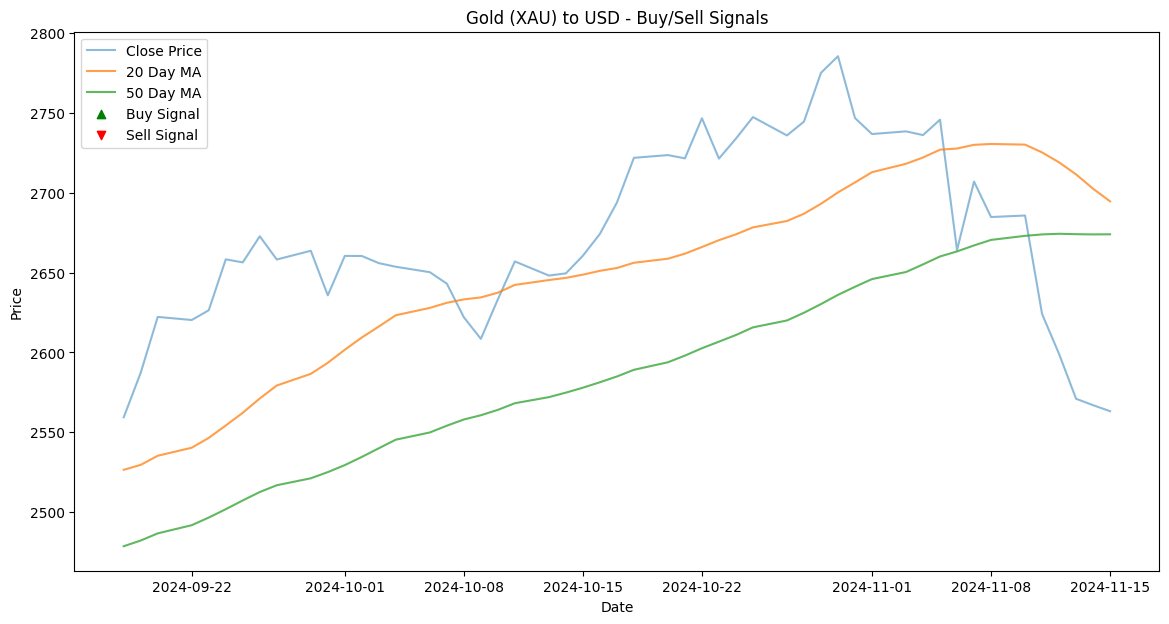

In [66]:
import matplotlib.pyplot as plt

# Plot Close price with moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['20_day_MA'], label='20 Day MA', alpha=0.75)
plt.plot(df['50_day_MA'], label='50 Day MA', alpha=0.75)

# Plot buy and sell signals
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', alpha=1)

# Adding title and labels
plt.title('Gold (XAU) to USD - Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [67]:
print(df[['20_day_MA', '50_day_MA', 'Signal']].tail())
print("Buy Signals:\n", buy_signals)
print("Sell Signals:\n", sell_signals)



            20_day_MA  50_day_MA  Signal
2024-11-11  2725.2375  2673.8964     0.0
2024-11-12  2719.0110  2674.2924     0.0
2024-11-13  2711.4830  2674.0370     0.0
2024-11-14  2702.4995  2673.8924     0.0
2024-11-15  2694.5905  2673.9690     0.0
Buy Signals:
 Empty DataFrame
Columns: [Open, High, Low, Close, 20_day_MA, 50_day_MA, Daily_Return, 20_day_volatility, Signal, Cumulative_Return, Buy_Signal, Sell_Signal]
Index: []
Sell Signals:
 Empty DataFrame
Columns: [Open, High, Low, Close, 20_day_MA, 50_day_MA, Daily_Return, 20_day_volatility, Signal, Cumulative_Return, Buy_Signal, Sell_Signal]
Index: []


In [68]:
df['Buy_Signal'] = (df['20_day_MA'] > df['50_day_MA']) & (df['20_day_MA'].shift(1) <= df['50_day_MA'].shift(1))
df['Sell_Signal'] = (df['20_day_MA'] < df['50_day_MA']) & (df['20_day_MA'].shift(1) >= df['50_day_MA'].shift(1))

buy_signals = df[df['Buy_Signal']]
sell_signals = df[df['Sell_Signal']]


In [69]:
# Adjust the moving averages to shorter windows for testing
df['10_day_MA'] = df['Close'].rolling(window=10).mean()
df['30_day_MA'] = df['Close'].rolling(window=30).mean()

# Detect new buy/sell signals based on 10-day and 30-day MAs
df['Buy_Signal'] = (df['10_day_MA'] > df['30_day_MA']) & (df['10_day_MA'].shift(1) <= df['30_day_MA'].shift(1))
df['Sell_Signal'] = (df['10_day_MA'] < df['30_day_MA']) & (df['10_day_MA'].shift(1) >= df['30_day_MA'].shift(1))

buy_signals = df[df['Buy_Signal']]
sell_signals = df[df['Sell_Signal']]


In [70]:
print(df[['20_day_MA', '50_day_MA', 'Signal']].tail())
print("Buy Signals:\n", buy_signals)
print("Sell Signals:\n", sell_signals)

            20_day_MA  50_day_MA  Signal
2024-11-11  2725.2375  2673.8964     0.0
2024-11-12  2719.0110  2674.2924     0.0
2024-11-13  2711.4830  2674.0370     0.0
2024-11-14  2702.4995  2673.8924     0.0
2024-11-15  2694.5905  2673.9690     0.0
Buy Signals:
 Empty DataFrame
Columns: [Open, High, Low, Close, 20_day_MA, 50_day_MA, Daily_Return, 20_day_volatility, Signal, Cumulative_Return, Buy_Signal, Sell_Signal, 10_day_MA, 30_day_MA]
Index: []
Sell Signals:
                Open     High     Low    Close  20_day_MA  50_day_MA  \
2024-11-12  2624.08  2627.21  2589.8  2599.03   2719.011  2674.2924   

            Daily_Return  20_day_volatility  Signal  Cumulative_Return  \
2024-11-12      -0.95462           1.106235     0.0           0.026586   

            Buy_Signal  Sell_Signal  10_day_MA    30_day_MA  
2024-11-12       False         True    2692.17  2701.684333  


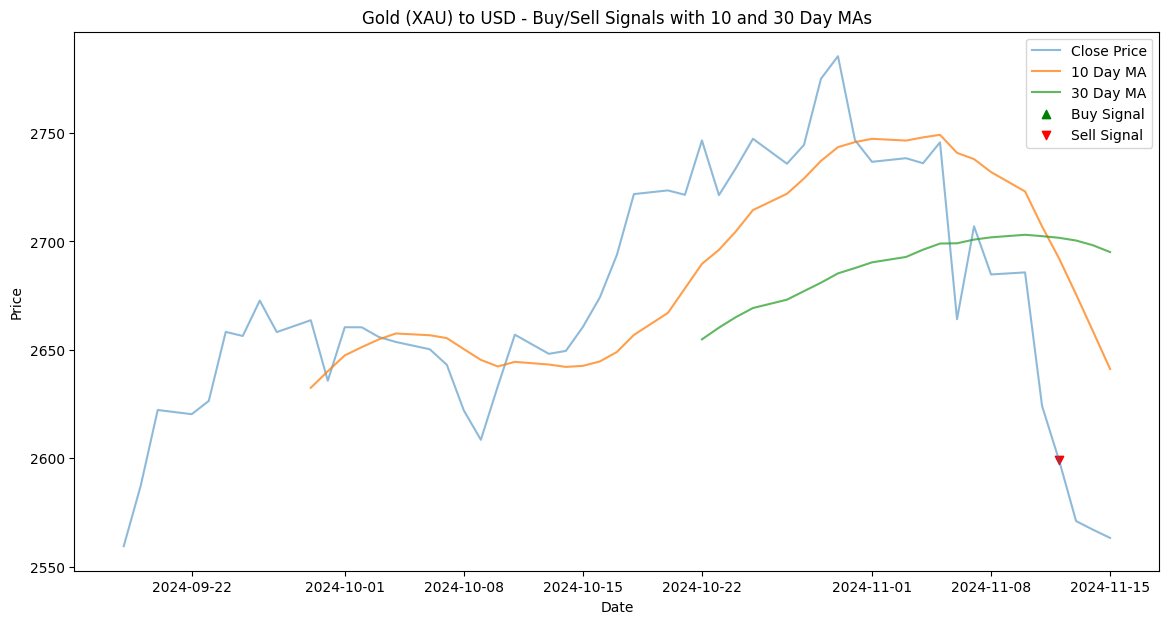

In [71]:

# Plot Close price with adjusted moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['10_day_MA'], label='10 Day MA', alpha=0.75)
plt.plot(df['30_day_MA'], label='30 Day MA', alpha=0.75)

# Plot buy and sell signals
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', alpha=1)

# Adding title and labels
plt.title('Gold (XAU) to USD - Buy/Sell Signals with 10 and 30 Day MAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare features
df['Lag_1'] = df['Close'].shift(1)   # Previous day's close
df['Lag_2'] = df['Close'].shift(2)   # Close from two days ago
df['Lag_3'] = df['Close'].shift(3)   # Close from three days ago
df['10_day_MA'] = df['Close'].rolling(window=10).mean()
df['20_day_MA'] = df['Close'].rolling(window=20).mean()
df['Volatility'] = df['Close'].rolling(window=20).std()

# Drop NaN values caused by shifting and rolling
df.dropna(inplace=True)

# Define features and target
X = df[['Lag_1', 'Lag_2', 'Lag_3', '10_day_MA', '20_day_MA', 'Volatility']]
y = df['Close']  # Predicting the next day's close

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [73]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


Mean Absolute Error: 137.60804641419728
Mean Squared Error: 21261.850911717913


In [74]:
# Additional lagged prices and moving average features
df['Lag_4'] = df['Close'].shift(4)
df['Lag_5'] = df['Close'].shift(5)
df['Lag_10'] = df['Close'].shift(10)
df['15_day_MA'] = df['Close'].rolling(window=15).mean()

# Drop NaN values caused by shifting and rolling
df.dropna(inplace=True)

# Define features and target with the new set of features
X = df[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_10', '10_day_MA', '15_day_MA', '20_day_MA', 'Volatility']]
y = df['Close']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Expressed in percentage

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")


Mean Absolute Error (MAE): 59.716234333225884
Mean Squared Error (MSE): 4301.296863750296
Mean Absolute Percentage Error (MAPE): 2.3288308018901054 %


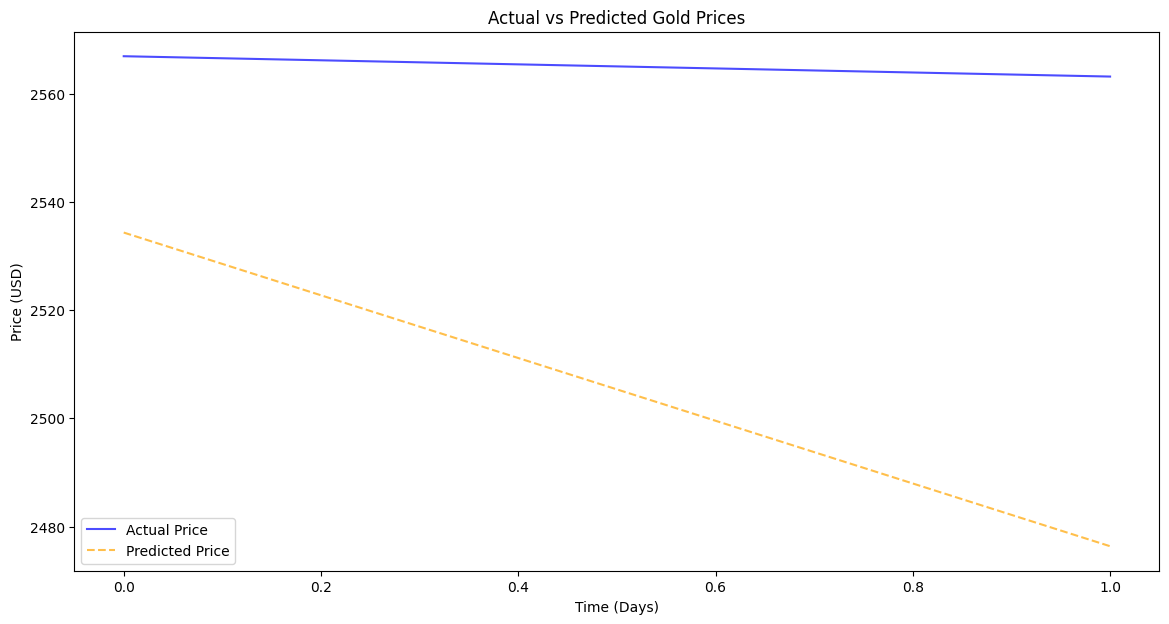

In [78]:
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted prices for easier plotting
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test_results = test_results.reset_index(drop=True)  # Reset index for easier plotting

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(test_results['Actual'], label='Actual Price', color='blue', alpha=0.7)
plt.plot(test_results['Predicted'], label='Predicted Price', color='orange', linestyle='--', alpha=0.7)
plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Time (Days)')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


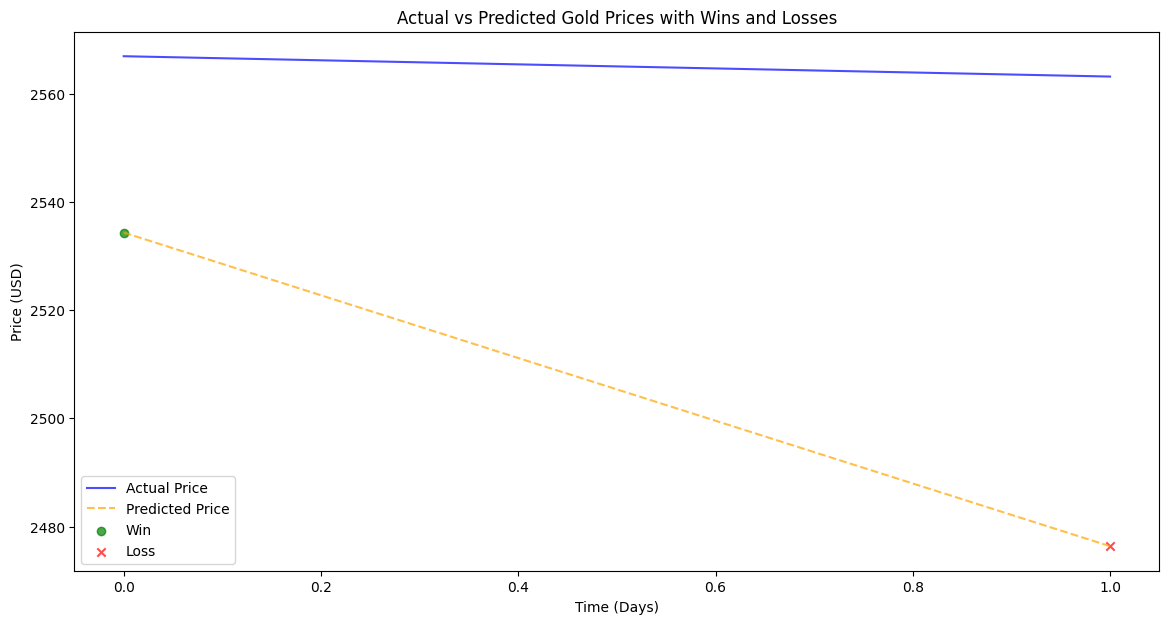

In [79]:
# Calculate the percentage error for each prediction
test_results['Error_Percentage'] = np.abs((test_results['Actual'] - test_results['Predicted']) / test_results['Actual']) * 100

# Define wins and losses based on the error threshold (e.g., 2%)
win_threshold = 2  # percentage
test_results['Win'] = test_results['Error_Percentage'] <= win_threshold

# Plot wins and losses
plt.figure(figsize=(14, 7))
plt.plot(test_results['Actual'], label='Actual Price', color='blue', alpha=0.7)
plt.plot(test_results['Predicted'], label='Predicted Price', color='orange', linestyle='--', alpha=0.7)

# Mark wins with green circles and losses with red crosses
wins = test_results[test_results['Win']]
losses = test_results[~test_results['Win']]

plt.scatter(wins.index, wins['Predicted'], color='green', marker='o', label='Win', alpha=0.7)
plt.scatter(losses.index, losses['Predicted'], color='red', marker='x', label='Loss', alpha=0.7)

plt.title('Actual vs Predicted Gold Prices with Wins and Losses')
plt.xlabel('Time (Days)')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_test and y_pred are available

# Create a DataFrame to hold actual and predicted values for the test set
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test_results = test_results.reset_index(drop=True)  # Reset index for easier plotting

# Calculate the error percentage for each prediction
test_results['Error_Percentage'] = np.abs((test_results['Actual'] - test_results['Predicted']) / test_results['Actual']) * 100

# Define wins and losses based on a 2% error threshold
win_threshold = 2  # percentage
test_results['Win'] = test_results['Error_Percentage'] <= win_threshold


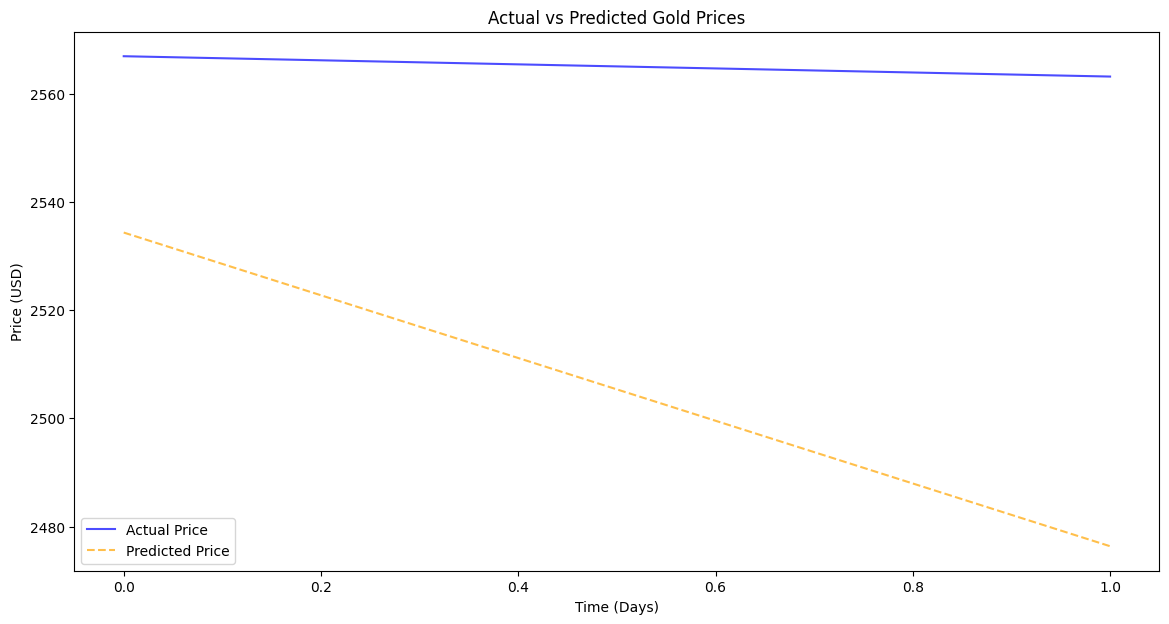

In [81]:
# Plotting Actual vs Predicted Prices
plt.figure(figsize=(14, 7))
plt.plot(test_results['Actual'], label='Actual Price', color='blue', alpha=0.7)
plt.plot(test_results['Predicted'], label='Predicted Price', color='orange', linestyle='--', alpha=0.7)

plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Time (Days)')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


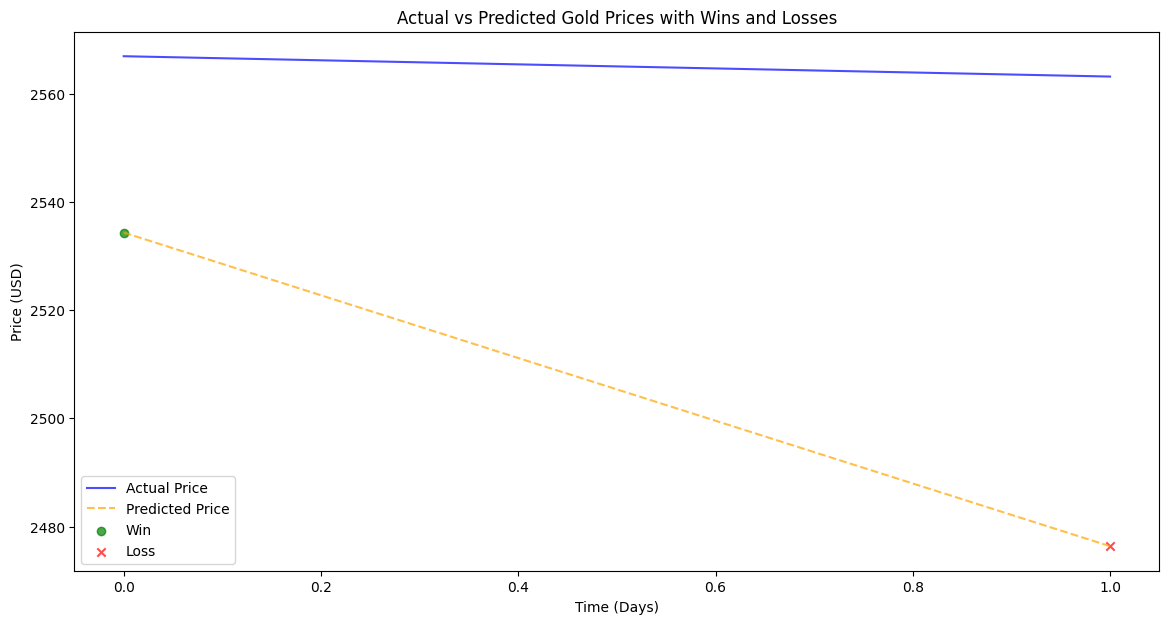

In [82]:
# Separate wins and losses for plotting
wins = test_results[test_results['Win']]
losses = test_results[~test_results['Win']]

# Plot Actual vs Predicted Prices with Wins and Losses
plt.figure(figsize=(14, 7))
plt.plot(test_results['Actual'], label='Actual Price', color='blue', alpha=0.7)
plt.plot(test_results['Predicted'], label='Predicted Price', color='orange', linestyle='--', alpha=0.7)

# Mark wins with green circles and losses with red crosses
plt.scatter(wins.index, wins['Predicted'], color='green', marker='o', label='Win', alpha=0.7)
plt.scatter(losses.index, losses['Predicted'], color='red', marker='x', label='Loss', alpha=0.7)

plt.title('Actual vs Predicted Gold Prices with Wins and Losses')
plt.xlabel('Time (Days)')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [83]:
# Display the number of samples in each set
print("Training data size:", X_train.shape[0])
print("Testing data size:", X_test.shape[0])


Training data size: 6
Testing data size: 2


In [84]:
df.head()

,Open,High,Low,Close,20_day_MA,50_day_MA,Daily_Return,20_day_volatility,Signal,Cumulative_Return,...,10_day_MA,30_day_MA,Lag_1,Lag_2,Lag_3,Volatility,Lag_4,Lag_5,Lag_10,15_day_MA
2024-11-07,2664.11,2710.40,2643.51,2706.98,2730.0030,2666.9982,1.608786,1.004164,0.0,0.069225,...,2737.996,2700.862333,2664.12,2745.74,2736.09,29.180890,2738.42,2736.75,2735.87,2737.672667
2024-11-08,2706.97,2710.44,2680.40,2684.77,2730.5315,2670.4538,-0.820472,1.018856,0.0,0.060452,...,2732.019,2701.900333,2706.98,2664.12,2745.74,28.196142,2736.09,2738.42,2744.54,2733.549333
2024-11-10,2682.59,2685.72,2681.52,2685.72,2730.1265,2672.9964,0.035385,1.005154,0.0,0.060827,...,2723.082,2703.083000,2684.77,2706.98,2664.12,28.802853,2745.74,2736.09,2775.09,2731.172667
2024-11-11,2685.69,2686.23,2610.67,2624.08,2725.2375,2673.8964,-2.295101,1.094382,0.0,0.036480,...,2706.942,2702.450333,2685.72,2684.77,2706.98,37.319362,2664.12,2745.74,2785.48,2723.852000
2024-11-12,2624.08,2627.21,2589.80,2599.03,2719.0110,2674.2924,-0.954620,1.106235,0.0,0.026586,...,2692.170,2701.684333,2624.08,2685.72,2684.77,46.798613,2706.98,2664.12,2746.75,2713.962000


In [85]:
# Display the total number of data points and features in the dataset
print("Total data size:", df.shape[0], "data points")
print("Total number of features:", df.shape[1])


Total data size: 8 data points
Total number of features: 22


In [87]:
df.shape

(8, 22)

In [88]:
df.head(8)

,Open,High,Low,Close,20_day_MA,50_day_MA,Daily_Return,20_day_volatility,Signal,Cumulative_Return,...,10_day_MA,30_day_MA,Lag_1,Lag_2,Lag_3,Volatility,Lag_4,Lag_5,Lag_10,15_day_MA
2024-11-07,2664.11,2710.40,2643.51,2706.98,2730.0030,2666.9982,1.608786,1.004164,0.0,0.069225,...,2737.996,2700.862333,2664.12,2745.74,2736.09,29.180890,2738.42,2736.75,2735.87,2737.672667
2024-11-08,2706.97,2710.44,2680.40,2684.77,2730.5315,2670.4538,-0.820472,1.018856,0.0,0.060452,...,2732.019,2701.900333,2706.98,2664.12,2745.74,28.196142,2736.09,2738.42,2744.54,2733.549333
2024-11-10,2682.59,2685.72,2681.52,2685.72,2730.1265,2672.9964,0.035385,1.005154,0.0,0.060827,...,2723.082,2703.083000,2684.77,2706.98,2664.12,28.802853,2745.74,2736.09,2775.09,2731.172667
2024-11-11,2685.69,2686.23,2610.67,2624.08,2725.2375,2673.8964,-2.295101,1.094382,0.0,0.036480,...,2706.942,2702.450333,2685.72,2684.77,2706.98,37.319362,2664.12,2745.74,2785.48,2723.852000
2024-11-12,2624.08,2627.21,2589.80,2599.03,2719.0110,2674.2924,-0.954620,1.106235,0.0,0.026586,...,2692.170,2701.684333,2624.08,2685.72,2684.77,46.798613,2706.98,2664.12,2746.75,2713.962000
2024-11-13,2599.06,2618.91,2569.46,2570.97,2711.4830,2674.0370,-1.079634,1.121625,0.0,0.015503,...,2675.592,2700.434333,2599.03,2624.08,2685.72,57.302737,2684.77,2706.98,2736.75,2702.968667
2024-11-14,2571.00,2577.54,2536.89,2566.95,2702.4995,2673.8924,-0.156361,1.086264,0.0,0.013915,...,2658.445,2698.224333,2570.97,2599.03,2624.08,65.062555,2685.72,2684.77,2738.42,2691.129333
2024-11-15,2566.97,2576.13,2554.58,2563.19,2694.5905,2673.9690,-0.146477,1.077988,0.0,0.012430,...,2641.155,2695.098333,2566.95,2570.97,2599.03,71.902558,2624.08,2685.72,2736.09,2677.002667


In [89]:
df

,Open,High,Low,Close,20_day_MA,50_day_MA,Daily_Return,20_day_volatility,Signal,Cumulative_Return,...,10_day_MA,30_day_MA,Lag_1,Lag_2,Lag_3,Volatility,Lag_4,Lag_5,Lag_10,15_day_MA
2024-11-07,2664.11,2710.40,2643.51,2706.98,2730.0030,2666.9982,1.608786,1.004164,0.0,0.069225,...,2737.996,2700.862333,2664.12,2745.74,2736.09,29.180890,2738.42,2736.75,2735.87,2737.672667
2024-11-08,2706.97,2710.44,2680.40,2684.77,2730.5315,2670.4538,-0.820472,1.018856,0.0,0.060452,...,2732.019,2701.900333,2706.98,2664.12,2745.74,28.196142,2736.09,2738.42,2744.54,2733.549333
2024-11-10,2682.59,2685.72,2681.52,2685.72,2730.1265,2672.9964,0.035385,1.005154,0.0,0.060827,...,2723.082,2703.083000,2684.77,2706.98,2664.12,28.802853,2745.74,2736.09,2775.09,2731.172667
2024-11-11,2685.69,2686.23,2610.67,2624.08,2725.2375,2673.8964,-2.295101,1.094382,0.0,0.036480,...,2706.942,2702.450333,2685.72,2684.77,2706.98,37.319362,2664.12,2745.74,2785.48,2723.852000
2024-11-12,2624.08,2627.21,2589.80,2599.03,2719.0110,2674.2924,-0.954620,1.106235,0.0,0.026586,...,2692.170,2701.684333,2624.08,2685.72,2684.77,46.798613,2706.98,2664.12,2746.75,2713.962000
2024-11-13,2599.06,2618.91,2569.46,2570.97,2711.4830,2674.0370,-1.079634,1.121625,0.0,0.015503,...,2675.592,2700.434333,2599.03,2624.08,2685.72,57.302737,2684.77,2706.98,2736.75,2702.968667
2024-11-14,2571.00,2577.54,2536.89,2566.95,2702.4995,2673.8924,-0.156361,1.086264,0.0,0.013915,...,2658.445,2698.224333,2570.97,2599.03,2624.08,65.062555,2685.72,2684.77,2738.42,2691.129333
2024-11-15,2566.97,2576.13,2554.58,2563.19,2694.5905,2673.9690,-0.146477,1.077988,0.0,0.012430,...,2641.155,2695.098333,2566.95,2570.97,2599.03,71.902558,2624.08,2685.72,2736.09,2677.002667
